#Use decision trees to prepare a model on fraud data
treating those who have taxable_income < 30000 as "Risky" and others are "Good"

**Data Description:**           
Undergrad : person is under graduated or not                
Marital.Status : marital status of a person                
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government                
Work Experience : Work experience of an individual person                
Urban : Whether that person belongs to urban area or not                 

In [6]:
import pandas as pd
fc = pd.read_csv('/content/Fraud_check (1).csv')
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [7]:
fc.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [8]:

fc.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


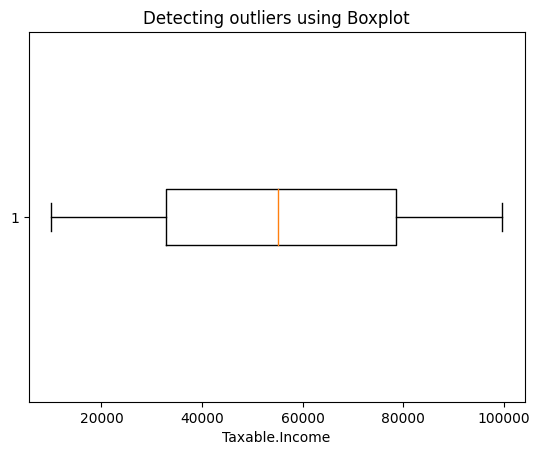

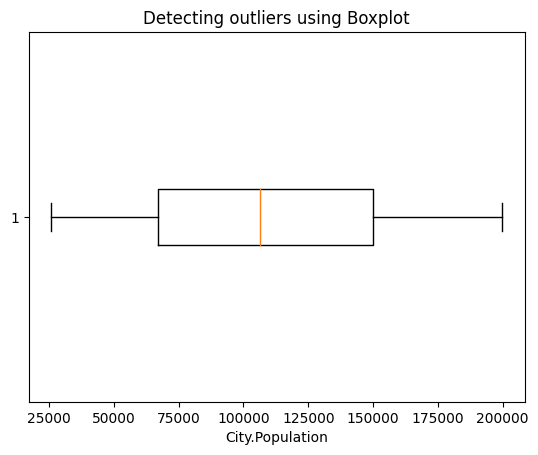

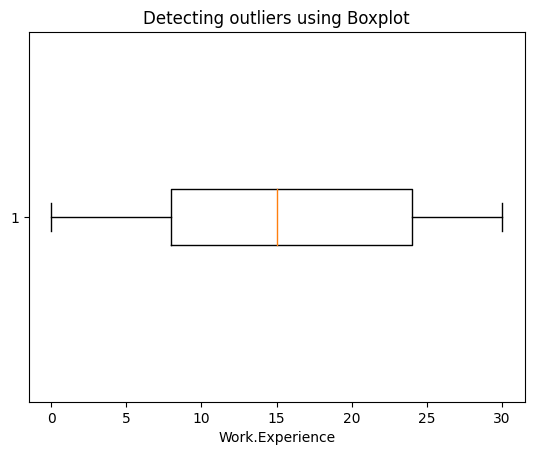

In [10]:
import matplotlib.pyplot as plt
for i in dict(fc.dtypes):
 if dict(fc.dtypes)[i] == 'int64' or dict(fc.dtypes)[i] ==  'float64':
  plt.boxplot(fc[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()


In [11]:

fc.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [12]:
fc['Taxable.Income'] = ['Good' if value > 30000 else 'Risky' for value in fc['Taxable.Income']]

fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [13]:
mappings = {}
for i in dict(fc.dtypes):
 if dict(fc.dtypes)[i] == 'O':
  mappings[i] = dict(zip(fc[i].unique(), range(len(fc[i].unique()))))
  fc[i] = fc[i].map(lambda x: mappings[i][x])
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,0,50047,10,0
1,1,1,0,134075,18,0
2,0,2,0,160205,30,0
3,1,0,0,193264,15,0
4,0,2,0,27533,28,1
...,...,...,...,...,...,...
595,1,1,0,39492,7,0
596,1,1,0,55369,2,0
597,0,1,0,154058,0,0
598,1,2,0,180083,17,1


In [14]:
fc.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income       2
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [15]:
fc.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

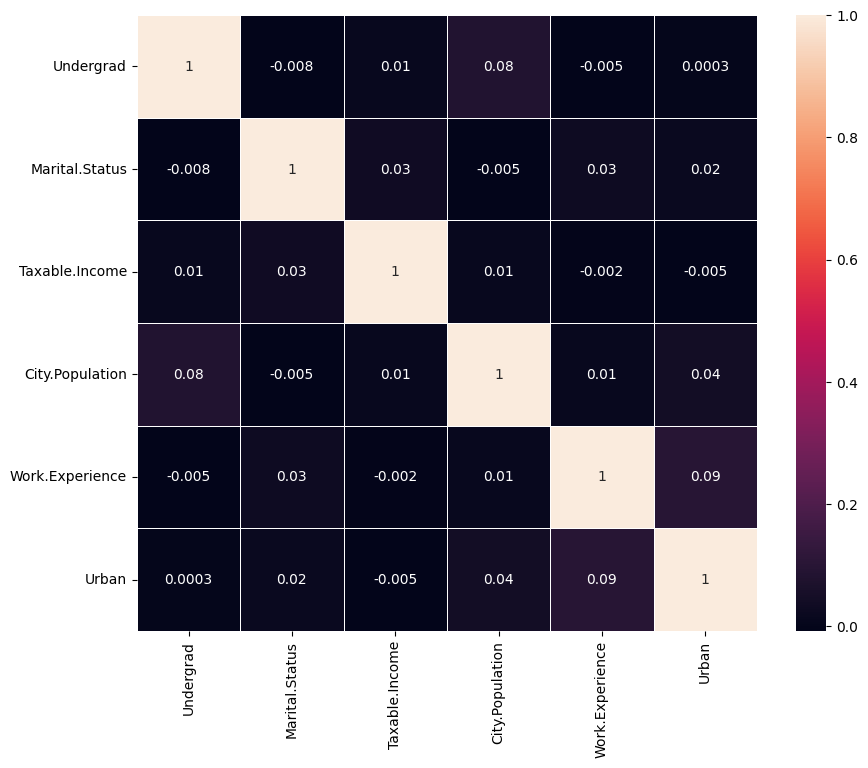

In [16]:
import seaborn as sns
plt.figure(figsize = (10, 8))
corr = fc.corr()

sns.heatmap(data = corr, annot = True, fmt = '.1g', linewidth = 0.5)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
y = fc['Taxable.Income']
x = fc.drop('Taxable.Income', axis =1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [18]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
145,0,1,197422,2,0
9,1,1,155482,4,0
375,0,2,130935,2,1
523,0,1,42198,12,1
188,0,1,137569,10,1
...,...,...,...,...,...
71,0,0,105680,22,1
106,1,0,58535,20,0
270,0,2,130680,5,1
435,0,1,111774,4,0


In [19]:

x_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
110,0,0,32450,19,0
419,0,2,138074,20,1
565,0,1,31064,28,1
77,1,2,118344,26,1
181,0,1,36116,20,1
...,...,...,...,...,...
399,0,0,74497,21,1
340,1,2,54437,21,0
148,0,2,197038,21,1
494,0,0,197045,13,0


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
radf = RandomForestClassifier()
radf = radf.fit(x_train, y_train)
predr = radf.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, predr))
print ('\n clasification report:\n', classification_report(y_test, predr))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predr))

Accuracy: 0.7583333333333333

 clasification report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.86        94
           1       0.00      0.00      0.00        26

    accuracy                           0.76       120
   macro avg       0.39      0.48      0.43       120
weighted avg       0.61      0.76      0.68       120


 confussion matrix:
 [[91  3]
 [26  0]]


In [21]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV



In [22]:
params = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [23]:
from sklearn.model_selection import GridSearchCV
optimize_model = GridSearchCV(estimator=radf, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
optimize_model.fit(x, y)
print("Best parameters: ", optimize_model.best_params_)

Fitting 4 folds for each of 150 candidates, totalling 600 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 100}


In [24]:
from sklearn.ensemble import RandomForestClassifier
radf = RandomForestClassifier( criterion = 'gini',max_depth = 2, min_samples_leaf=5, n_estimators=100)
radf = radf.fit(x_train, y_train)
predr = radf.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, predr))
print ('\n clasification report:\n', classification_report(y_test, predr))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predr))


Accuracy: 0.7833333333333333

 clasification report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120


 confussion matrix:
 [[94  0]
 [26  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0.         0.         0.         0.03846154 0.03846154 0.11538462
 0.11538462 0.19230769 0.19230769 0.23076923 0.23076923 0.26923077
 0.26923077 0.30769231 0.30769231 0.34615385 0.34615385 0.38461538
 0.38461538 0.42307692 0.42307692 0.46153846 0.46153846 0.5
 0.5        0.61538462 0.61538462 0.65384615 0.65384615 0.73076923
 0.73076923 0.76923077 0.76923077 0.80769231 0.80769231 0.84615385
 0.84615385 0.96153846 0.96153846 1.         1.        ]
[0.         0.0106383  0.06382979 0.06382979 0.23404255 0.23404255
 0.26595745 0.26595745 0.31914894 0.31914894 0.34042553 0.34042553
 0.43617021 0.43617021 0.45744681 0.45744681 0.53191489 0.53191489
 0.57446809 0.57446809 0.64893617 0.64893617 0.65957447 0.65957447
 0.67021277 0.67021277 0.68085106 0.68085106 0.69148936 0.69148936
 0.73404255 0.73404255 0.75531915 0.75531915 0.79787234 0.79787234
 0.93617021 0.93617021 0.95744681 0.95744681 1.        ]
[1.25216692 0.25216692 0.23938481 0.23800303 0.2268657  0.22519813
 0.22193482 0.21974571

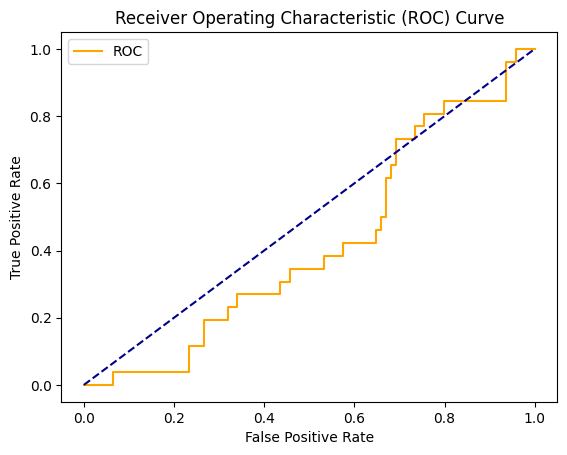

In [26]:
import numpy as np

pred_prob = radf.predict_proba(x_test)[:,1]

from sklearn import metrics
def plot_roc_curve(fpr, tpr):
 plt.plot(fpr, tpr, color='orange', label='ROC')
 plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')
 plt.title('Receiver Operating Characteristic (ROC) Curve')
 plt.legend()
 plt.show()


y_true = y_test
y_scores = pred_prob
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_scores)        # Important step
print(tpr)
print(fpr)
print(thresholds)
print(metrics.roc_auc_score(y_true, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)
